## RFM Based Customer Segmentation

In [110]:
%pwd

'c:\\Users\\VenuraP\\Desktop\\RFM Based Customer Segmentation\\data\\notebooks'

In [111]:
# Date
# Settings
import warnings
import datetime as dt
import pandas as pd
df = pd.read_excel('online_retail_II.xlsx')
df.head(40)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Data Exploration

In [113]:
# Removing returned products (Invoice numbers starting with C) from the data set
df = df[~df["Invoice"].str.contains("C", na = False)]

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515255 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      515255 non-null  object        
 1   StockCode    515255 non-null  object        
 2   Description  512327 non-null  object        
 3   Quantity     515255 non-null  int64         
 4   InvoiceDate  515255 non-null  datetime64[ns]
 5   Price        515255 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      515255 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.4+ MB


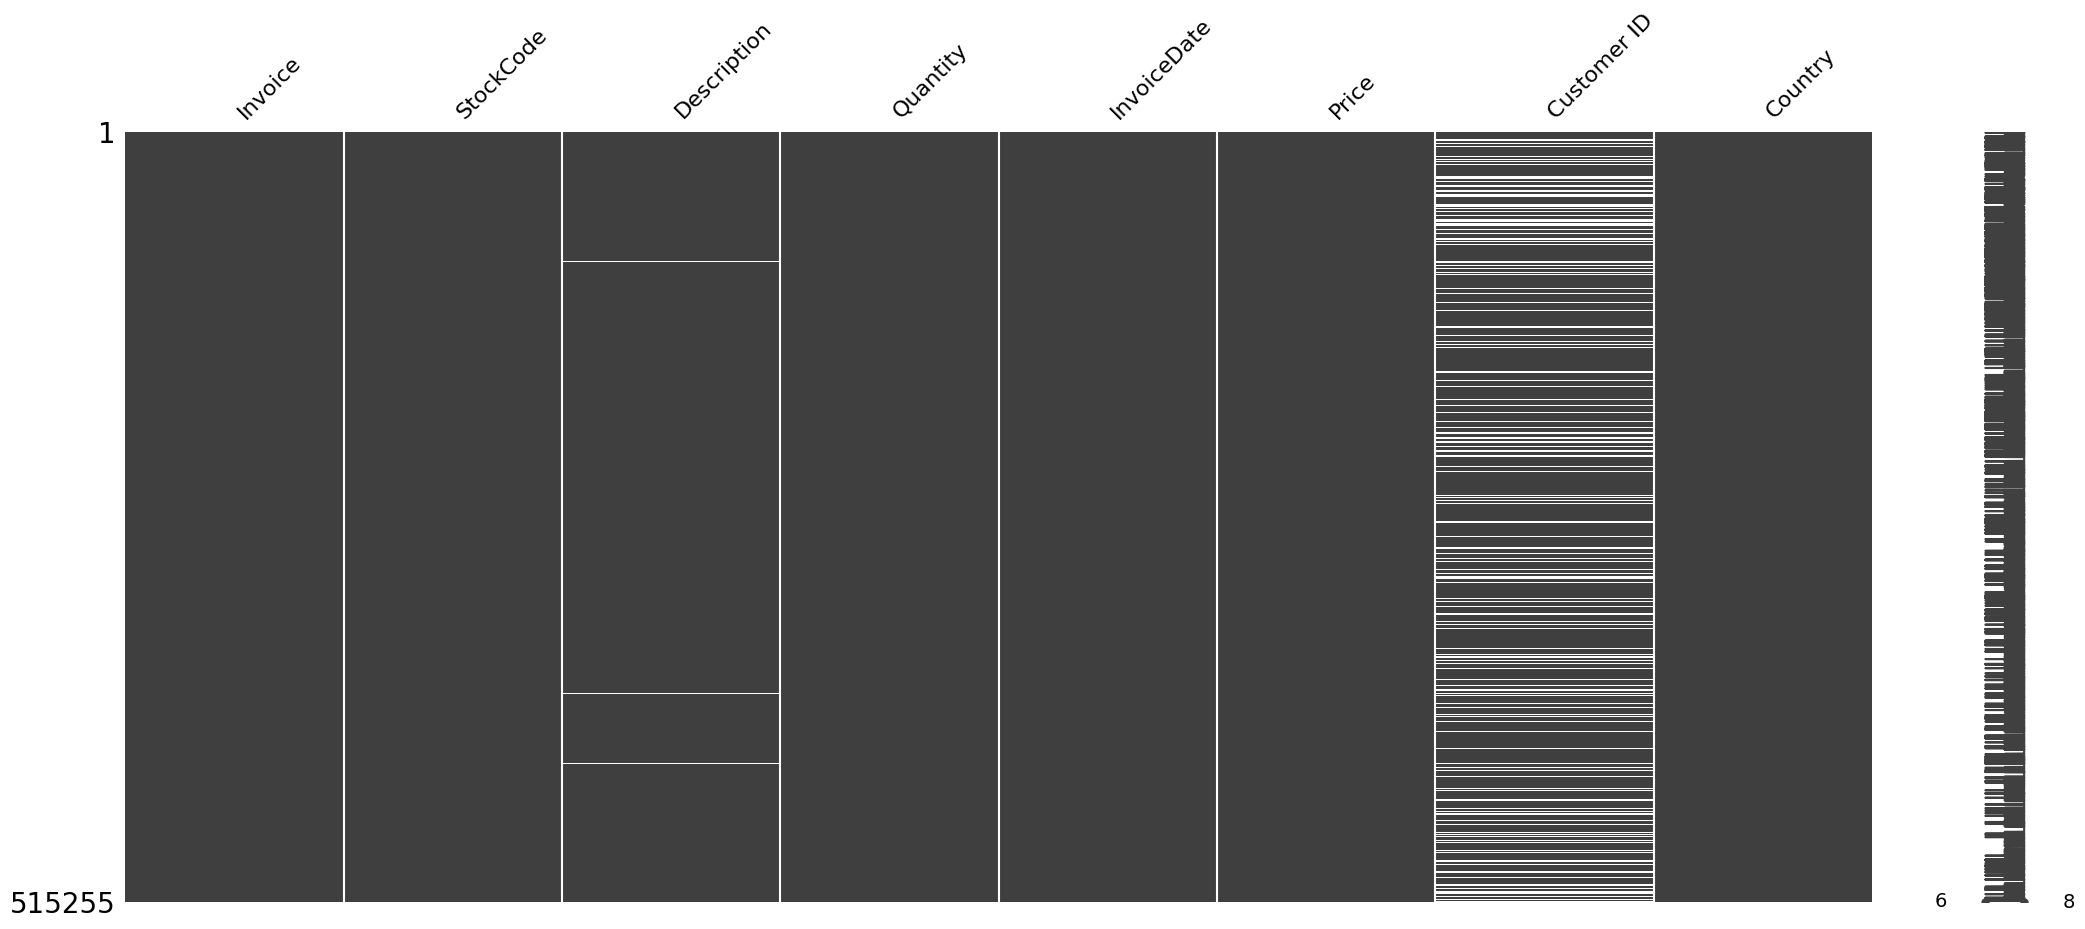

In [115]:
import matplotlib.pyplot as plt
import missingno as msno

# Matrix visualization of NaN values
msno.matrix(df)
plt.show()

In [116]:
# Viewing rows where 'Description' column is NaN
na_description = df[df['Description'].isna()]
na_description.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


In [117]:
# Viewing rows where 'Customer ID' column is NaN
na_customer_id = df[df['Customer ID'].isna()]
na_customer_id.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [118]:
df["InvoiceDate"].max() # Last invoice date

Timestamp('2010-12-09 20:01:00')

In [119]:
today_date = dt.datetime(2011,12,9) # last invoice date is assigned to today_date variable
print(today_date)

2011-12-09 00:00:00


In [120]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,515255.000000,515255,515255.000000,407695.000000
mean,10.956631,2010-06-28 17:41:06.558422528,3.956373,15368.504107
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 13:27:00,1.250000,13997.000000
50%,3.000000,2010-07-06 13:13:00,2.100000,15321.000000
75%,10.000000,2010-10-15 14:27:00,4.210000,16812.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,104.354013,NaN,127.688563,1679.795700


In [121]:
df.loc[(df.Price<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [122]:
df.loc[(df.Quantity<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524458,538092,37467,NaN,-177,2010-12-09 14:49:00,0.0,NaN,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,NaN,United Kingdom


### Need to clean above values which doesnt represent the real sales

In [123]:
df.isnull().mean()*100

Invoice         0.000000
StockCode       0.000000
Description     0.568262
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    20.875101
Country         0.000000
dtype: float64

### Checking which country has the best representation of customers

In [124]:
df.Country.value_counts(normalize=True) 

Country
United Kingdom          0.925868
EIRE                    0.018360
Germany                 0.014868
France                  0.010736
Netherlands             0.005298
Spain                   0.002397
Switzerland             0.002271
Portugal                0.002059
Belgium                 0.002015
Sweden                  0.001721
Channel Islands         0.001593
Italy                   0.001378
Australia               0.001223
Cyprus                  0.001050
Austria                 0.001017
Greece                  0.000994
Denmark                 0.000811
United Arab Emirates    0.000774
Norway                  0.000708
Finland                 0.000673
Unspecified             0.000594
USA                     0.000446
Poland                  0.000353
Malta                   0.000330
Japan                   0.000318
Lithuania               0.000299
Singapore               0.000227
RSA                     0.000213
Bahrain                 0.000206
Canada                  0.000149
Th

### Since we have 90% of UK customer base we take that for analysis

In [125]:
df=df[df.Country == 'United Kingdom']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Remove Garbage Data

In [126]:
df = df[df.Quantity > 0]
df = df[df.Price > 0]

#Removing the Null values from data.
df = df[pd.notnull(df['Customer ID'])]

In [127]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [128]:
df.isnull().mean()

Invoice             0.0
StockCode           0.0
Description         0.0
Quantity            0.0
InvoiceDate         0.0
Price               0.0
Customer ID         0.0
Country             0.0
InvoiceYearMonth    0.0
Date                0.0
dtype: float64

### AS we focus on the the RFM analysis we need this data
- Customer ID
- Price
- Qunatity
- Invoice Date

### Aggregating Orders by Month

In [131]:
df_agg= df.groupby("Date").Quantity.sum()
df_agg

Date
2009-12    361783
2010-01    236956
2010-02    235073
2010-03    385372
2010-04    291692
2010-05    328210
2010-06    333286
2010-07    280827
2010-08    314367
2010-09    480331
2010-10    505380
2010-11    555515
2010-12    139781
Name: Quantity, dtype: int64